In [49]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [50]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Labels

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Label \t Class")
for index, i in enumerate(class_names):
  print(index,'\t',i)

Label 	 Class
0 	 T-shirt/top
1 	 Trouser
2 	 Pullover
3 	 Dress
4 	 Coat
5 	 Sandal
6 	 Shirt
7 	 Sneaker
8 	 Bag
9 	 Ankle boot


Dataset Shape

In [52]:
print("Training Images Shape:",train_images.shape)
print("Training Labels Shape:",train_labels.shape)
print("Test Images Shape:",test_images.shape)
print("Test Images Shape:",test_labels.shape)


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Images Shape: (10000,)


Data Preprocessing

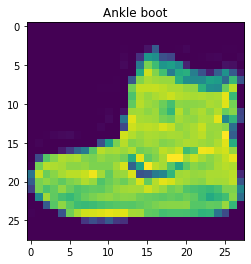

In [53]:
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[ train_labels[0] ])
plt.show()

Normalizing Data

In [54]:
train_images = train_images / 255.0
test_images = test_images /255.0

In [55]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

Creating Model

In [56]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

Compiling using Adam optimizer

In [57]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels, epochs = 50, callbacks = [callbacks])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4972 - accuracy: 0.8248
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3722 - accuracy: 0.8668
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8767
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8855
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8919
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8958
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9014
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9026
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9078
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

Evaluating the accuracy

In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8849
Test Loss: 0.35930135846138
Test Accuracy: 0.8848999738693237
